Consider the following inhomogeneous parabolic initial/boundary value problem: 
$$u_{t}(t,x) = (1-x^{2})u_{xx}(t,x)+u(t,x),$$ for $t \in [0,1]$ and $x \in [-1,1]$
$$u(0,x) = \sin(\pi x),$$ for $x \in [-1,1]$ initial condition 
$$u(t,-1)=u(t,1)=0,$$ $t \in [-1,1]$ Dirichlet boundary conditions.

Construct a Backward Euler method with $N_{x} =39$ and $Nt=400$ (i.e$\mu=1$) and show the iterations $n=100,200,400.$

In addition construct a Crank Nicolson method  with $N_{x} =39$ and $Nt=20$ (i.e$\mu=1/h$) and show the iterations $n=5,10,20.$

## Implicit Backward Euler Method 

In [3]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt




Nx = 39 # GRID POINTS on space interval
Nt = 400 # GRID POINTS on time interval


L = 1
dx = (L - (-L))/(Nx - 1)
t0 = 0
Tf = 1
dt = (Tf - t0)/(Nt - 1)
h = (L - (-L))/(Nx+1)
t = Tf / Nt
m = t/h**2
print("m =", round(m))

xspan = np.linspace(-L, L, Nx)
tspan = np.linspace(t0, Tf, Nt)


main_diag = (1 + 2*m )*np.ones((1,Nx-2))
off_diag = -m*np.ones((1, Nx-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((Nx, Nt))

#----- Initial condition -----
U[:,0] = np.sin(np.pi*xspan)

#----- Boundary condition ----- 
U[0,:] = 0.0 
U[-1,:] = 0.0

for k in range(1, Nt):
    c = np.zeros((Nx-4,1)).ravel()-1
    b1 = np.asarray([m*U[0,k], m*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:Nx-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:Nx-1, k] = np.linalg.solve(A,b)  # Solve x=A\b



# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

m = 1


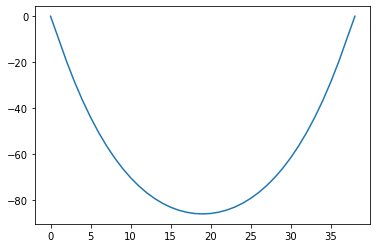

In [4]:
plt.plot(U[:,100])
plt.show()

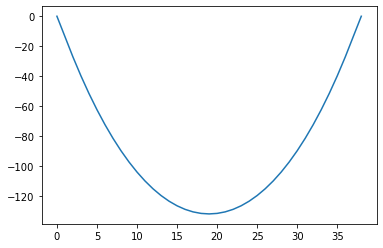

In [5]:
plt.plot(U[:,200])
plt.show()

## Crank - Nicolson 

m = 20


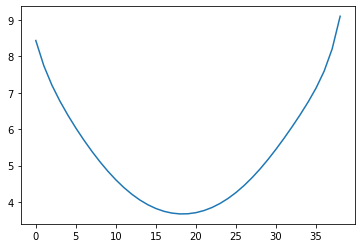

In [6]:
Nx = 39 
Nt = 20 

L = 1
dx = (L - (-L))/(Nx - 1)
t0 = 0
Tf = 1
dt = (Tf - t0)/(Nt - 1)
h = (L - (-L))/(Nx+1)
t = Tf / Nt
m = t/h**2
print("m =", round(m))
xspan = np.linspace(-L, L, Nx)
tspan = np.linspace(t0, Tf, Nt)

a0 = 1 + 2*m
c0 = 1 - 2*m




main_diag_a0 = a0*np.ones((1,Nx))
off_diag_a0 = -m*np.ones((1, Nx-1))

main_diag_c0 = c0*np.ones((1,Nx))
off_diag_c0 = m*np.ones((1, Nx-1))

# Left-hand side tri-diagonal matrix
a = main_diag_a0.shape[1]
diagonalsA = [main_diag_a0, off_diag_a0, off_diag_a0]
A = sparse.diags(diagonalsA, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*m
A[Nx-1,Nx-2] = -2*m

# Right-hand side tri-diagonal matrix
c = main_diag_c0.shape[1]
diagonalsC = [main_diag_c0, off_diag_c0, off_diag_c0]
A_rhs = sparse.diags(diagonalsC, [0,-1,1], shape=(c,c)).toarray()
A_rhs[0,1] = 2*m
A_rhs[Nx-1,Nx-2] = 2*m

# ----- Initializes matrix U -----
U = np.zeros((Nx, Nt))

#----- Initial condition -----
U[:,0] = np.sin(np.pi*xspan)
#----- Boundary condition -----
U[0,:] = 0.0
U[-1,:] = 0.0

for k in range(1, Nt):
    ins = np.zeros((Nx-2,1)).ravel()
    b1 = np.asarray([2*m, 2*m])
    b1 = np.insert(b1, 1, ins)
    b2 = np.matmul(A_rhs, np.array(U[0:Nx, k-1]))
    b = b1 + b2  # Right hand side
    U[0:Nx, k] = np.linalg.solve(A,b)  # Solve x=A\b



X, T = np.meshgrid(tspan, xspan)
plt.plot(U[:,5])
plt.show()

